In [1]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import scipy as sp
import random
import pandas as pd
import seaborn as sns
import itertools

In [2]:
#读取训练测试数据
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#将训练集分成测试训练两个部分
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

In [4]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

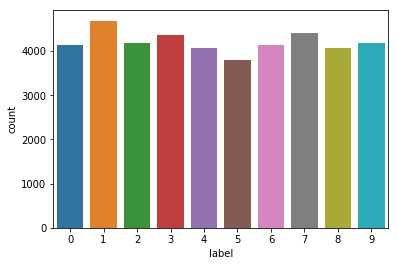

In [5]:
#显示各个数值的分布
sns.countplot(Y_train)
Y_train.value_counts()

In [6]:
#判断是否有空值
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
#数据预处理函数
def data_preparation(train,test):
    Y_train = train["label"]
    X_train = train.drop(labels = ["label"],axis = 1)
  
    X_train = X_train / 255.0
    X_test = test / 255.0
   
    X_train = X_train.values.reshape(-1,28,28,1)
    X_test = X_test.values.reshape(-1,28,28,1)

    Y_train = to_categorical(Y_train, num_classes = 10)
    return X_train, Y_train, X_test


In [9]:
X_train, Y_train, X_test = data_preparation(train, test)

In [10]:
random_seed = 27

In [11]:
#随机划分训练集测试集
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [12]:
Y_val

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

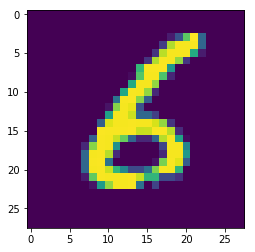

In [13]:
#显示预处理后的图像数据
plt.imshow(X_train[13][:,:,0])

In [14]:
model = Sequential()
#Conv2D 卷积层
#Dropout 层
#Dense 全连接层
#Flatten Flattening layer(展平层)
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
#上面的代码中，输入层是卷积层，其获取28 * 28 * 1的输入图像。
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [15]:
#初始化优化器
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [16]:
#选择优化器并指定损失函数（如categorical_crossentropy）来指定反向传播的计算方法
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [18]:
#定义图像预处理对象
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

In [19]:
#将预处理完毕的图像提供给模型并进行训练
history = model.fit(datagen.flow(X_train,Y_train, batch_size=32), epochs=50, validation_data = (X_val,Y_val), 
                    shuffle=True, callbacks=[model_checkpoint_callback])

Epoch 1/50
1182/1182 [==============================] - 113s 95ms/step - loss: 0.2265 - accuracy: 0.9292 - val_loss: 0.0625 - val_accuracy: 0.9817
Epoch 2/50
1182/1182 [==============================] - 115s 98ms/step - loss: 0.0910 - accuracy: 0.9717 - val_loss: 0.0745 - val_accuracy: 0.9769
Epoch 3/50
1182/1182 [==============================] - 114s 97ms/step - loss: 0.0742 - accuracy: 0.9771 - val_loss: 0.0455 - val_accuracy: 0.9855
Epoch 4/50
1182/1182 [==============================] - 114s 97ms/step - loss: 0.0643 - accuracy: 0.9812 - val_loss: 0.0435 - val_accuracy: 0.9871
Epoch 5/50
1182/1182 [==============================] - 114s 97ms/step - loss: 0.0565 - accuracy: 0.9834 - val_loss: 0.0338 - val_accuracy: 0.9917
Epoch 6/50
1182/1182 [==============================] - 114s 97ms/step - loss: 0.0539 - accuracy: 0.9846 - val_loss: 0.0468 - val_accuracy: 0.9869
Epoch 7/50
1182/1182 [==============================] - 114s 96ms/step - loss: 0.0470 - accuracy: 0.9863 - val_loss: 0

In [20]:
model.load_weights(checkpoint_filepath)
#获得预测结果
predictions = model.predict(X_test, verbose=0)

In [21]:
predictions = np.argmax(predictions,axis = 1)

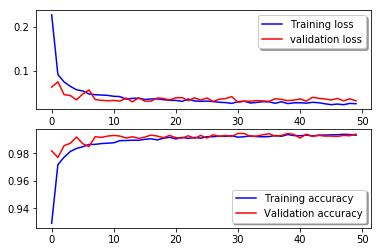

In [22]:
#模型评估
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

预测值:0


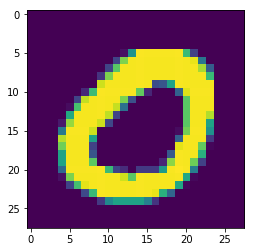

In [23]:
#模型预测测试
random_number = random.randint(0,len(X_test)-1)
plt.imshow(X_test[random_number][:,:,0])
print("预测值:{:d}".format(predictions[random_number]))

In [24]:
#提交并生成csv文件
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("submission.csv", index=False, header=True)